# 1. Importing relevant libraries

In [2]:
!pip3 install pycaret[full]
!pip3 install scikit-learn==0.23.2

     |████████████████████████████████| 261 kB 1.3 MB/s 
     |████████████████████████████████| 6.8 MB 5.3 MB/s 
     |████████████████████████████████| 24.2 MB 29.9 MB/s 
     |████████████████████████████████| 102 kB 34.4 MB/s 
     |████████████████████████████████| 14.2 MB 60.8 MB/s 
     |████████████████████████████████| 167 kB 45.0 MB/s 
     |████████████████████████████████| 345 kB 55.7 MB/s 
     |████████████████████████████████| 3.6 MB 54.0 MB/s 
     |████████████████████████████████| 79 kB 5.7 MB/s 
     |████████████████████████████████| 7.5 MB 50.7 MB/s 
     |████████████████████████████████| 547 kB 48.3 MB/s 
     |████████████████████████████████| 136 kB 69.3 MB/s 
     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 45 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 26.3 MB/s 
     |████████████████████████████████| 79 kB 6.3 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |██████████████████

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from pycaret.classification import * 

In [4]:
test_df = pd.read_csv("./churn-bigml-20.csv")
customer_df = pd.read_csv("./churn-bigml-80.csv")

In [5]:
customer_df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

# 2. Exploratory Data Analysis

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
customer_df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

## 2.1 Seperating categorical and numerical variables

In [8]:
customer_df.shape

(2666, 20)

In [9]:
customer_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [10]:
customer_df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Some bit of manual sorting has to be done here as certain categories are actually represented by numbers

In [11]:
numeric_columns = ["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"]
categorical_columns = ["State", "Area code", "International plan", "Voice mail plan", "Churn"]
target = ["Churn"]

numeric_df = customer_df[numeric_columns]
test_numeric_df = test_df[numeric_columns]

categorical_df = customer_df[categorical_columns]
test_categorical_df = test_df[categorical_columns]

target_df = customer_df[target]
test_target_df = test_df[target]

## 2.2 Distribution of target variable

In [12]:
customer_df["Churn"].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

We see quite a large disparity between our target variable. This can be an issue later on. Common ways to mitigate this issue is to look at different evaluation metrics, or perform some form of oversamping/undersamping of minority and majority class respectively

In [13]:
# Just making sure we split the columns correctly
len(numeric_columns) + len(categorical_columns) + len(target)

21

## 2.3 Correlation of numeric variables

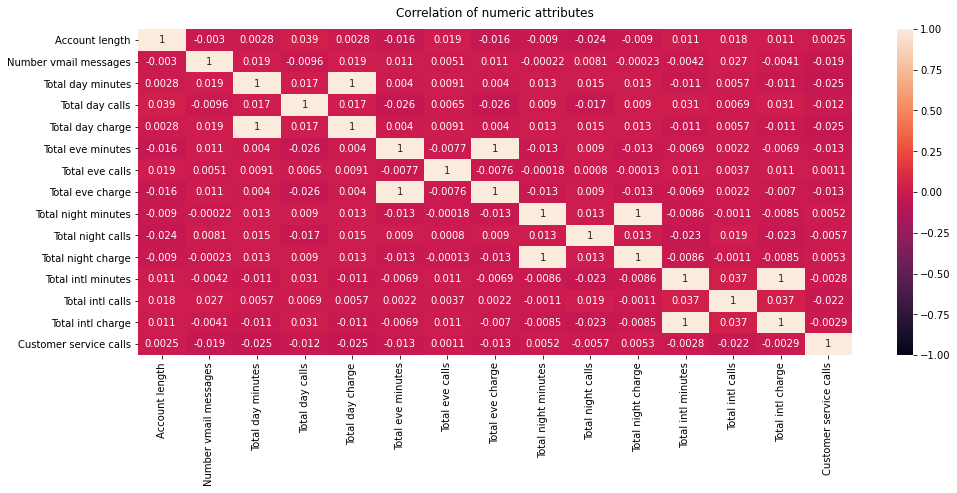

In [14]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation of numeric attributes', fontdict={'fontsize':12}, pad=12);

We can see that there are certain attributes with correlation of 1. Total minutes and total charge is perfectly correlated, regardless whether it is day calls, evening calls, night calls. or international calls.<br> We can immediately drop these attributes.

## 2.4 Distribution of numeric variables

Histogram for Numerical Variables


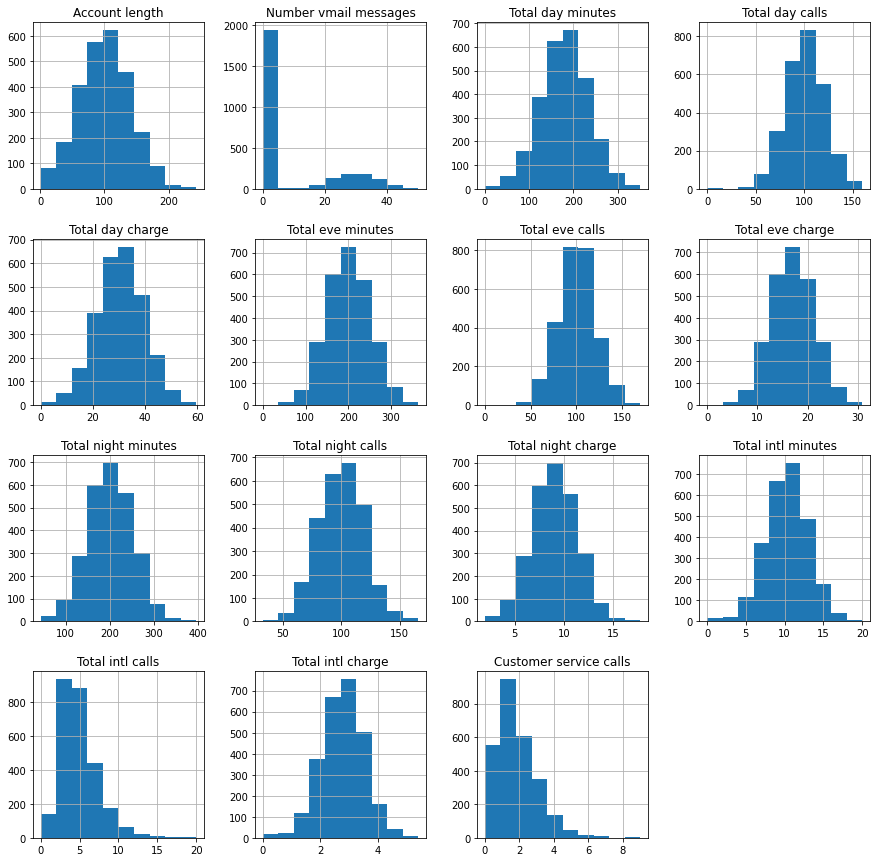

In [15]:
print ("Histogram for Numerical Variables")
plots = numeric_df.hist(figsize=(15,15))

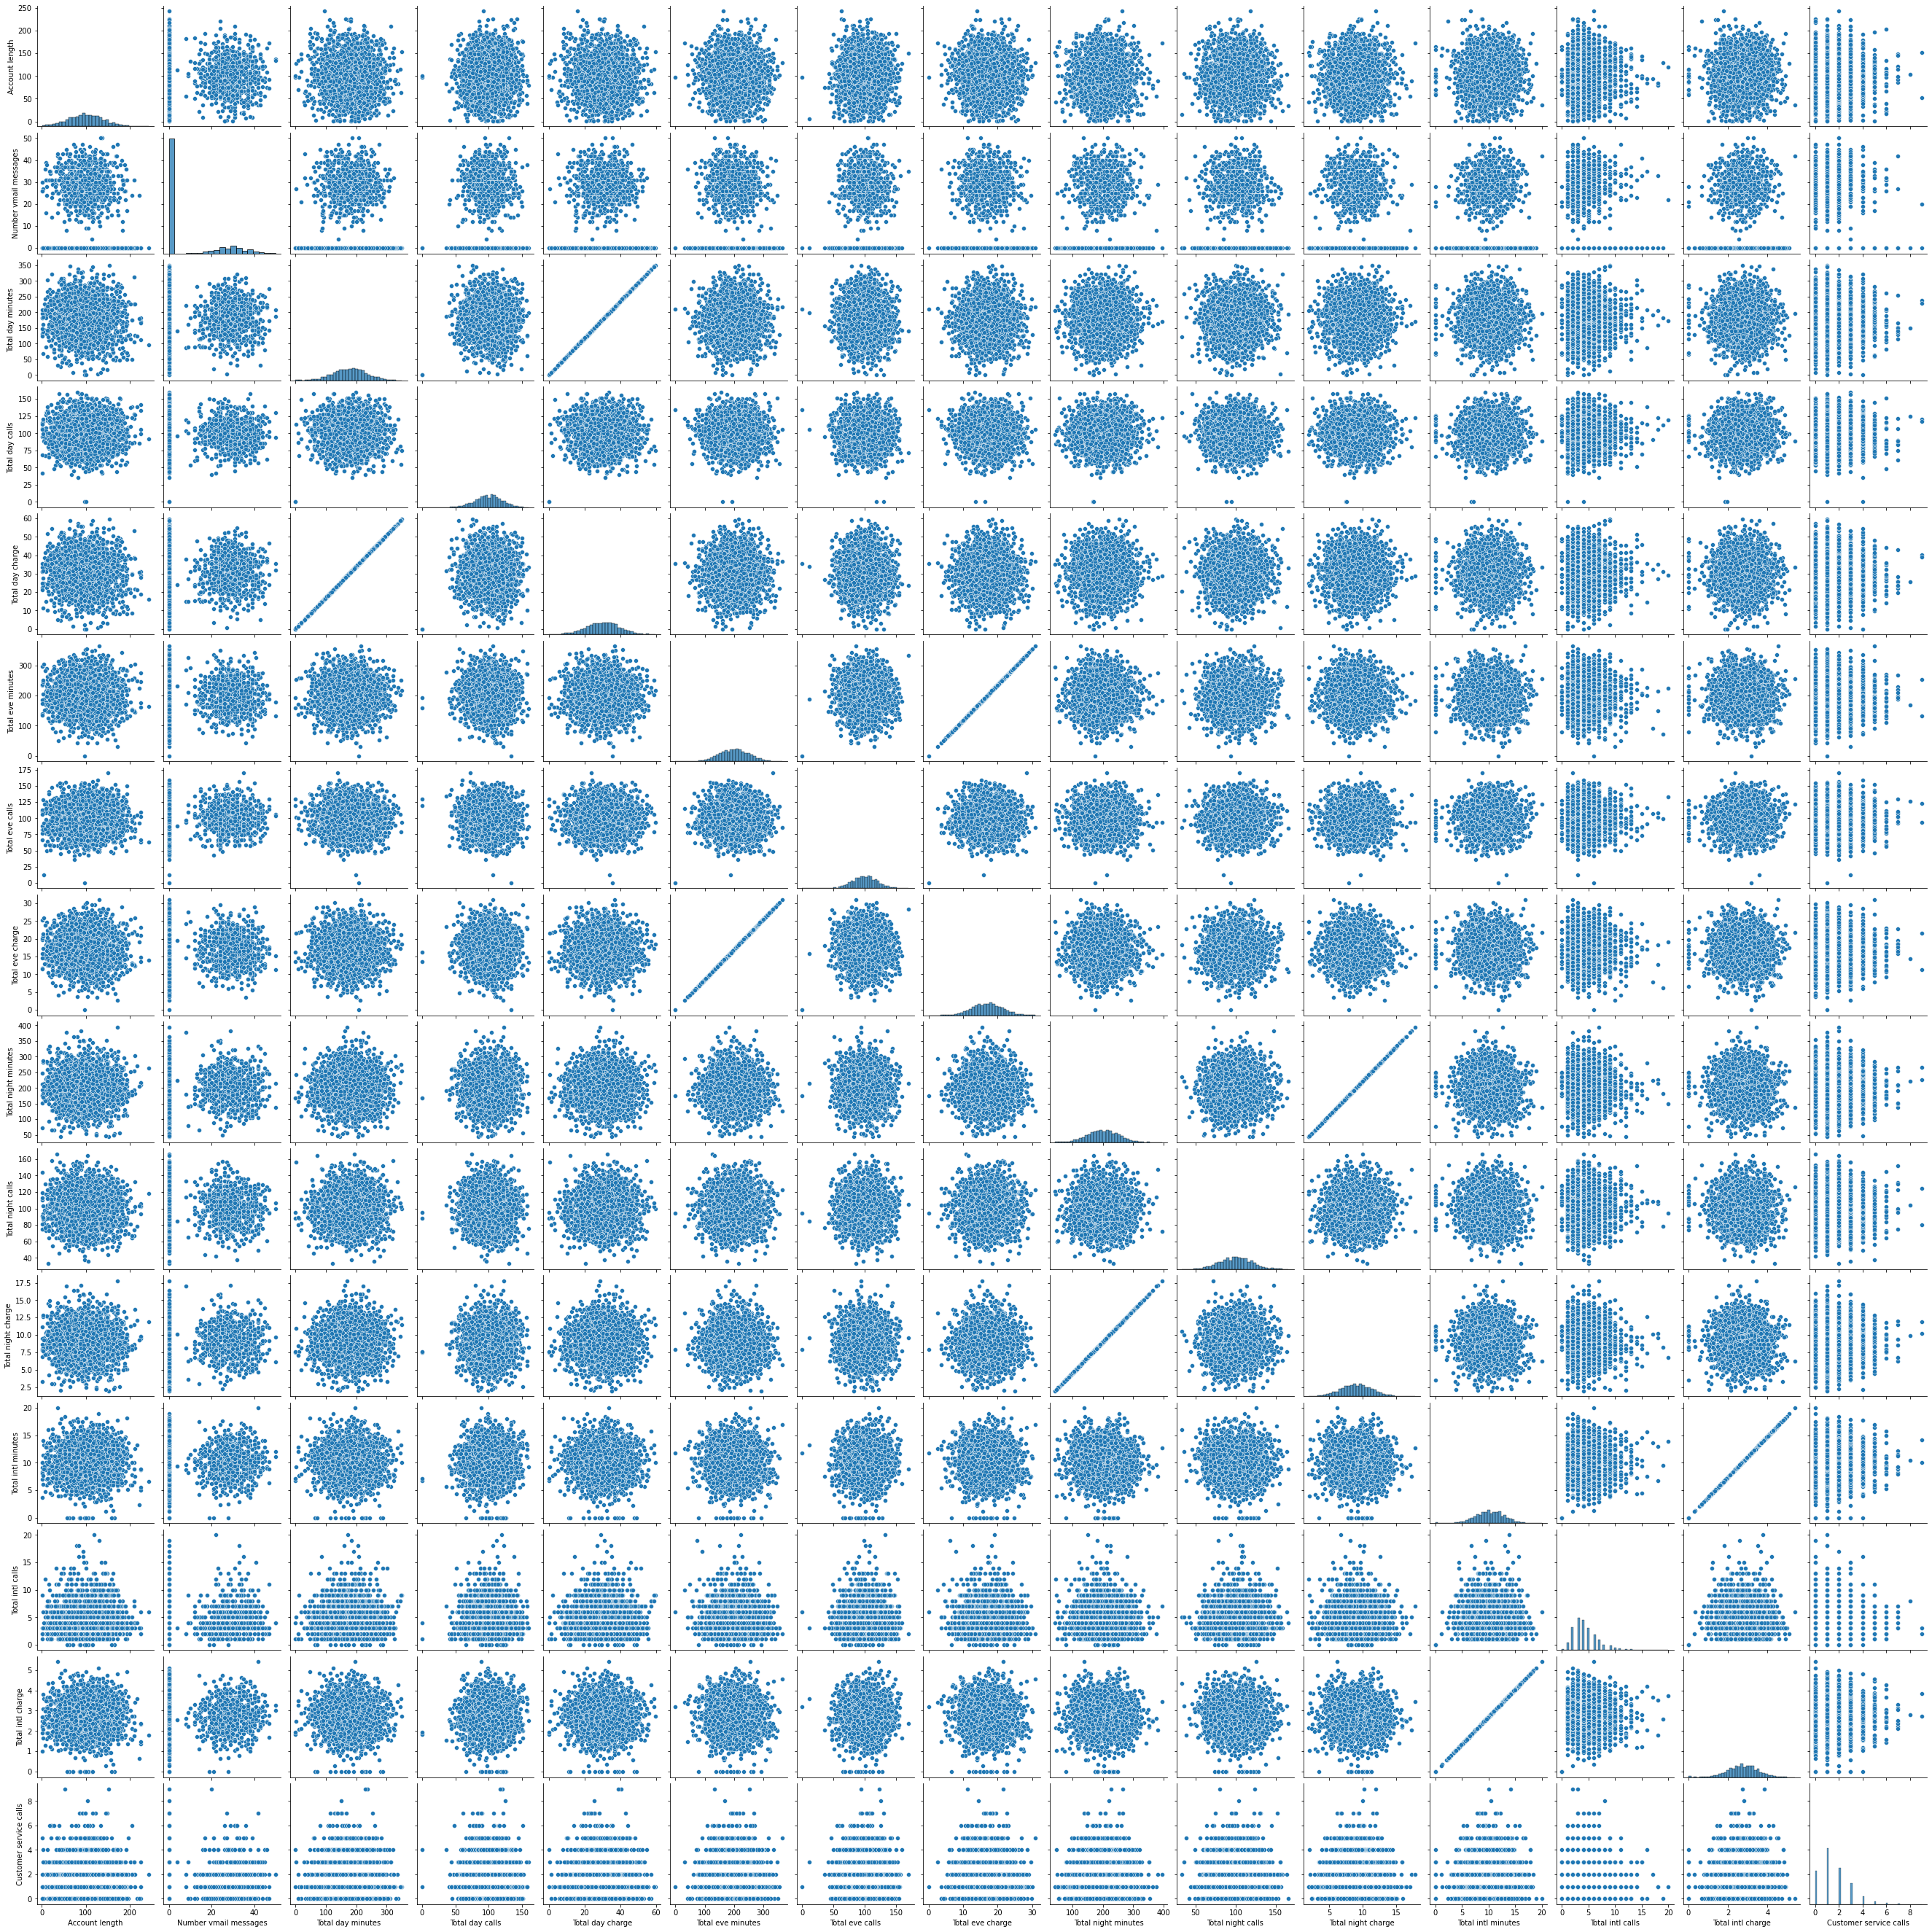

In [16]:
sns.pairplot(numeric_df)
plt.show()

## 2.5 Distribution of categorical variables

In [17]:
categorical_df.shape

(2666, 5)

In [18]:
categorical_df.head()

State  Area code International plan Voice mail plan  Churn
0    KS        415                 No             Yes  False
1    OH        415                 No             Yes  False
2    NJ        415                 No              No  False
3    OH        408                Yes              No  False
4    OK        415                Yes              No  False

In [19]:
len(categorical_df["State"].value_counts())

51

[[Text(0.0, 0, ''),
  Text(500.0, 0, ''),
  Text(1000.0, 0, ''),
  Text(1500.0, 0, ''),
  Text(2000.0, 0, ''),
  Text(2500.0, 0, '')]]

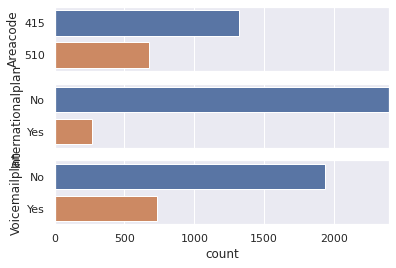

<Figure size 576x432 with 0 Axes>

In [20]:
temp_df = categorical_df[["Area code", "International plan", "Voice mail plan"]]
temp_df.columns = temp_df.columns.str.replace(' ', '')
sns.set(style="darkgrid")
fig, ax =plt.subplots(3,1)
fig = plt.figure(figsize=(8, 6))
max_count = max([max(temp_df[i].value_counts()) for i in temp_df.columns])
Area_code=sns.countplot(y=temp_df['Areacode'],ax=ax[0],order=temp_df.Areacode.value_counts().iloc[:2].index)
International_plan=sns.countplot(y=temp_df['Internationalplan'],ax=ax[1],order=temp_df.Internationalplan.value_counts().iloc[:2].index)
Voice_mail_plan=sns.countplot(y=temp_df['Voicemailplan'],ax=ax[2],order=temp_df.Voicemailplan.value_counts().iloc[:2].index)
ax[0].set_xlim(0,max_count)
ax[1].set_xlim(0,max_count)
ax[2].set_xlim(0,max_count)
Area_code.set(xticklabels=[])
International_plan.set(xticklabels=[])

# 3. Preprocessing

## 3.1 Removing multicollinearlity

In [21]:
numeric_df.drop(columns=["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"], axis=1, inplace=True)
test_numeric_df.drop(columns=["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"], axis=1, inplace=True)

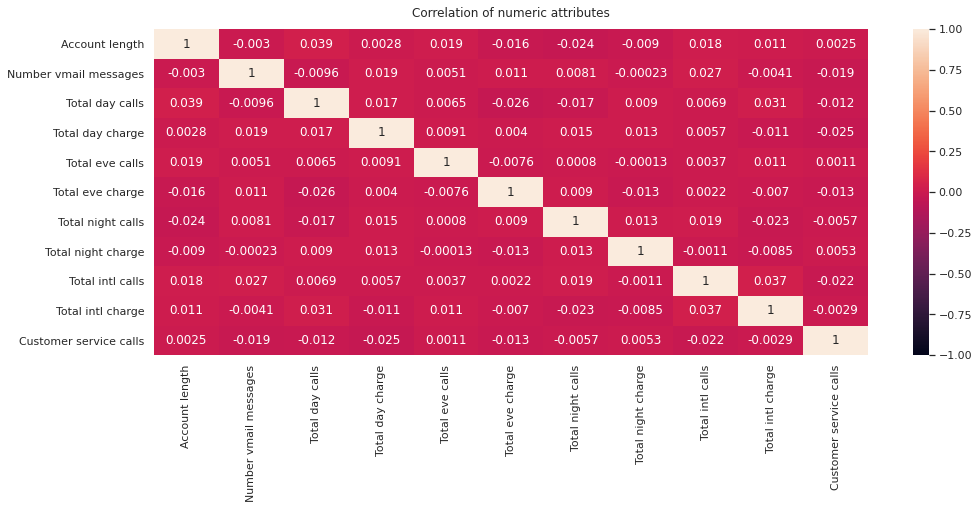

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation of numeric attributes', fontdict={'fontsize':12}, pad=12);

In [23]:
numeric_df.head()
# test_numeric_df.head()

Account length  Number vmail messages  Total day calls  Total day charge  \
0             128                     25              110             45.07   
1             107                     26              123             27.47   
2             137                      0              114             41.38   
3              84                      0               71             50.90   
4              75                      0              113             28.34   

   Total eve calls  Total eve charge  Total night calls  Total night charge  \
0               99             16.78                 91               11.01   
1              103             16.62                103               11.45   
2              110             10.30                104                7.32   
3               88              5.26                 89                8.86   
4              122             12.61                121                8.41   

   Total intl calls  Total intl charge  Customer service calls  
0                 3               2.70                       1  
1                 3               3.70                       1  
2                 5               3.29                       0  
3                 7               1.78                       2  
4                 3               2.73                       3

## 3.2 Scaling numeric attributes

In [24]:
scaler = StandardScaler()
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df) , columns = numeric_df.columns)
test_numeric_df = pd.DataFrame(scaler.transform(test_numeric_df) , columns = test_numeric_df.columns)

In [25]:
numeric_df.head()

Account length  Number vmail messages  Total day calls  Total day charge  \
0        0.692163               1.247508         0.484868          1.579942   
1        0.161278               1.320985         1.135375         -0.330194   
2        0.919686              -0.589414         0.685024          1.179465   
3       -0.420168              -0.589414        -1.466653          2.212675   
4       -0.647691              -0.589414         0.634985         -0.235772   

   Total eve calls  Total eve charge  Total night calls  Total night charge  \
0        -0.050781         -0.058445          -0.469031            0.856707   
1         0.147654         -0.095397           0.149054            1.049293   
2         0.494917         -1.554963           0.200561           -0.758391   
3        -0.596479         -2.718922          -0.572045           -0.084339   
4         1.090224         -1.021482           1.076181           -0.281303   

   Total intl calls  Total intl charge  Customer service calls  
0         -0.597527          -0.085681               -0.429172  
1         -0.597527           1.242921               -0.429172  
2          0.216894           0.698194               -1.191955  
3          1.031314          -1.307995                0.333610  
4         -0.597527          -0.045823                1.096392

## 3.3 One-hot encoding nominal attributes

In [26]:
categorical_df.head()

State  Area code International plan Voice mail plan  Churn
0    KS        415                 No             Yes  False
1    OH        415                 No             Yes  False
2    NJ        415                 No              No  False
3    OH        408                Yes              No  False
4    OK        415                Yes              No  False

In [27]:
list(categorical_df.columns)

['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn']

In [28]:
new_category_df = categorical_df.copy(deep=True)
new_category_df.head()

new_test_category_df = test_categorical_df.copy(deep=True)

In [29]:
nominal_categories =  ['Area code', 'State']
for category in nominal_categories:
    nominal_column = categorical_df[category]
    nominal_column = nominal_column.reset_index(drop=True)
    dummy_columns = pd.get_dummies(nominal_column.astype(str))
    new_category_df.drop(columns=[category], axis=1, inplace=True)
    new_category_df = new_category_df.reset_index(drop=True)
    new_category_df = pd.concat([new_category_df, dummy_columns], axis=1)
    
for category in nominal_categories:
    nominal_column = test_categorical_df[category]
    nominal_column = nominal_column.reset_index(drop=True)
    dummy_columns = pd.get_dummies(nominal_column.astype(str))
    new_test_category_df.drop(columns=[category], axis=1, inplace=True)
    new_test_category_df = new_test_category_df.reset_index(drop=True)
    new_test_category_df = pd.concat([new_test_category_df, dummy_columns], axis=1)

In [30]:
new_category_df.head()

International plan Voice mail plan  Churn  408  415  510  AK  AL  AR  AZ  \
0                 No             Yes  False    0    1    0   0   0   0   0   
1                 No             Yes  False    0    1    0   0   0   0   0   
2                 No              No  False    0    1    0   0   0   0   0   
3                Yes              No  False    1    0    0   0   0   0   0   
4                Yes              No  False    0    1    0   0   0   0   0   

   CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   TN  TX  UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0   0

In [31]:
new_test_category_df.head()

International plan Voice mail plan  Churn  408  415  510  AK  AL  AR  AZ  \
0                 No              No  False    1    0    0   0   0   0   0   
1                 No              No   True    0    1    0   0   0   0   0   
2                 No              No   True    0    1    0   0   0   0   0   
3                 No              No  False    0    1    0   0   0   0   0   
4                 No              No  False    0    0    1   0   0   0   0   

   CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   

   MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   TN  TX  UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0   0

## 3.4 Label encoding ordinal values

In [32]:
intl_plan = {"International plan":{"No": 0, "Yes": 1}}
new_category_df = new_category_df.replace(intl_plan)
new_test_category_df = new_test_category_df.replace(intl_plan)
             
vm_plan = {"Voice mail plan":{"No": 0, "Yes": 1}}
new_category_df = new_category_df.replace(vm_plan)
new_test_category_df = new_test_category_df.replace(vm_plan)

churn_cleanup = {"Churn":{False: 0, True: 1}}
new_category_df = new_category_df.replace(churn_cleanup)
new_test_category_df = new_test_category_df.replace(churn_cleanup)

In [33]:
new_category_df

International plan  Voice mail plan  Churn  408  415  510  AK  AL  AR  \
0                      0                1      0    0    1    0   0   0   0   
1                      0                1      0    0    1    0   0   0   0   
2                      0                0      0    0    1    0   0   0   0   
3                      1                0      0    1    0    0   0   0   0   
4                      1                0      0    0    1    0   0   0   0   
...                  ...              ...    ...  ...  ...  ...  ..  ..  ..   
2661                   0                0      0    0    1    0   0   0   0   
2662                   0                1      0    0    1    0   0   0   0   
2663                   0                0      0    0    1    0   0   0   0   
2664                   0                0      0    0    0    1   0   0   0   
2665                   0                1      0    0    1    0   0   0   0   

      AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
2661   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2662   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2663   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2664   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2665   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
2      0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
2661   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2662   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2663   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2664   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2665   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
0      0   0   0   0   0   0   0   0   0   0   0   0  
1      0   0   0   0   0   0   0   0   0   0   0   0  
2      0   0   0   0   0   0   0   0   0   0   0   0  
3      0   0   0   0   0   0   0   0   0   0   0   0  
4      0   0   0   0   0   0   0   0   0   0   0   0  
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2661   0   1   0   0   0   0   0   0   0   0   0   0  
2662   0   0   0   0   0   0   0   0   0   0   0   0  
2663   0   0   0   0   0   0   0   0   0   0   1   0  
2664   1   0   0   0   0   0   0   0   0   0   0   0  
2665   0   0   0   1   0   0   0   0   0   0   0   0  

[2666 rows x 57 columns]

In [34]:
new_test_category_df

International plan  Voice mail plan  Churn  408  415  510  AK  AL  AR  \
0                     0                0      0    1    0    0   0   0   0   
1                     0                0      1    0    1    0   0   0   0   
2                     0                0      1    0    1    0   0   0   0   
3                     0                0      0    0    1    0   0   0   0   
4                     0                0      0    0    0    1   0   0   0   
..                  ...              ...    ...  ...  ...  ...  ..  ..  ..   
662                   0                1      0    0    1    0   0   0   0   
663                   0                1      0    1    0    0   0   1   0   
664                   0                0      0    0    1    0   0   0   0   
665                   0                0      0    0    1    0   0   0   0   
666                   1                0      0    0    0    1   0   0   0   

     AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
1     0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
662   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
663   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
664   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
665   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
666   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

     ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
662   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
663   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
664   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
665   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
666   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

     RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
0     0   0   0   0   0   0   0   0   0   0   0   0  
1     0   0   0   0   0   0   0   0   0   0   0   0  
2     0   0   0   0   0   0   0   0   0   0   0   0  
3     0   1   0   0   0   0   0   0   0   0   0   0  
4     0   0   0   0   0   0   0   0   0   0   0   0  
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
662   0   0   0   0   0   0   0   0   0   1   0   0  
663   0   0   0   0   0   0   0   0   0   0   0   0  
664   0   0   0   0   0   0   0   1   0   0   0   0  
665   0   0   0   0   0   0   0   0   0   0   1   0  
666   0   0   0   0   0   0   0   0   0   0   0   0  

[667 rows x 57 columns]

## 3.5 Combining numeric and categorical columns

In [35]:
new_category_df = new_category_df.reset_index(drop=True)
new_test_category_df = new_test_category_df.reset_index(drop=True)

In [36]:
combined_df = pd.concat([numeric_df, new_category_df], axis=1)
combined_test_df = pd.concat([test_numeric_df, new_test_category_df], axis=1)

In [37]:
combined_df.head()

Account length  Number vmail messages  Total day calls  Total day charge  \
0        0.692163               1.247508         0.484868          1.579942   
1        0.161278               1.320985         1.135375         -0.330194   
2        0.919686              -0.589414         0.685024          1.179465   
3       -0.420168              -0.589414        -1.466653          2.212675   
4       -0.647691              -0.589414         0.634985         -0.235772   

   Total eve calls  Total eve charge  Total night calls  Total night charge  \
0        -0.050781         -0.058445          -0.469031            0.856707   
1         0.147654         -0.095397           0.149054            1.049293   
2         0.494917         -1.554963           0.200561           -0.758391   
3        -0.596479         -2.718922          -0.572045           -0.084339   
4         1.090224         -1.021482           1.076181           -0.281303   

   Total intl calls  Total intl charge  Customer service calls  \
0         -0.597527          -0.085681               -0.429172   
1         -0.597527           1.242921               -0.429172   
2          0.216894           0.698194               -1.191955   
3          1.031314          -1.307995                0.333610   
4         -0.597527          -0.045823                1.096392   

   International plan  Voice mail plan  Churn  408  415  510  AK  AL  AR  AZ  \
0                   0                1      0    0    1    0   0   0   0   0   
1                   0                1      0    0    1    0   0   0   0   0   
2                   0                0      0    0    1    0   0   0   0   0   
3                   1                0      0    1    0    0   0   0   0   0   
4                   1                0      0    0    1    0   0   0   0   0   

   CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   TN  TX  UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0   0

In [38]:
combined_test_df.head()

Account length  Number vmail messages  Total day calls  Total day charge  \
0        0.414080              -0.589414        -0.165639          0.093075   
1       -0.900493              -0.589414         1.835921         -0.929282   
2        1.526412              -0.589414        -1.666809          2.830213   
3        0.262399              -0.589414         0.134595         -1.274408   
4       -1.304977              -0.589414         0.835141         -1.110527   

   Total eve calls  Total eve charge  Total night calls  Total night charge  \
0        -0.993351          2.969232          -0.520538            0.287702   
1        -0.844524          0.551247           0.561110            0.152016   
2        -0.149999          2.304113           1.436730           -0.797784   
3         0.098046         -1.238570           0.252068           -0.228779   
4         0.445308          0.287971          -0.520538           -0.443250   

   Total intl calls  Total intl charge  Customer service calls  \
0         -0.190317          -0.550692               -0.429172   
1          0.624104           0.884198                1.859175   
2          1.845734          -1.733148                1.859175   
3          0.624104          -0.909415                0.333610   
4         -1.411947           0.312899               -0.429172   

   International plan  Voice mail plan  Churn  408  415  510  AK  AL  AR  AZ  \
0                   0                0      0    1    0    0   0   0   0   0   
1                   0                0      1    0    1    0   0   0   0   0   
2                   0                0      1    0    1    0   0   0   0   0   
3                   0                0      0    0    1    0   0   0   0   0   
4                   0                0      0    0    0    1   0   0   0   0   

   CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   

   MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   TN  TX  UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0   0

# 4. Dimensionality reduction using PCA

## 4.1 Creating Pipeline

In [39]:
steps = [('pca', PCA()), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

## 4.2 Benchmarking with Logistic Regression

In [40]:
models = {}
for i in range(1,60):
    steps = [('pca', PCA(n_components=i)), ('lr', LogisticRegression())]
    models[str(i)] = Pipeline(steps=steps)

In [41]:
x_columns = combined_df.columns.tolist()
x_columns.remove('Churn')

In [42]:
results = []
names = []
for name, model in models.items():
    model.fit(combined_df[x_columns],combined_df["Churn"])
    y_pred = model.predict(combined_test_df[x_columns])
    f1 = f1_score(combined_test_df["Churn"], y_pred)
    accuracy = accuracy_score(combined_test_df["Churn"], y_pred)
    results.append(f1)
    names.append(name)
    print(f"{name} components: F1 score ->{f1}, accuracy score ->{accuracy}")

1 components: F1 score ->0.0, accuracy score ->0.8575712143928036
2 components: F1 score ->0.0, accuracy score ->0.8575712143928036
3 components: F1 score ->0.0, accuracy score ->0.8575712143928036
4 components: F1 score ->0.0, accuracy score ->0.8575712143928036
5 components: F1 score ->0.0, accuracy score ->0.8575712143928036
6 components: F1 score ->0.0, accuracy score ->0.8575712143928036
7 components: F1 score ->0.0, accuracy score ->0.8575712143928036
8 components: F1 score ->0.020618556701030927, accuracy score ->0.8575712143928036
9 components: F1 score ->0.17543859649122806, accuracy score ->0.8590704647676162
10 components: F1 score ->0.16071428571428573, accuracy score ->0.8590704647676162
11 components: F1 score ->0.17543859649122806, accuracy score ->0.8590704647676162
12 components: F1 score ->0.17543859649122806, accuracy score ->0.8590704647676162
13 components: F1 score ->0.1724137931034483, accuracy score ->0.856071964017991
14 components: F1 score ->0.274809160305343

We see F1 score perform really poorly due to the class imbalance in our dataset

# 5. SMOTE for class balancing

In [43]:
combined_df["Churn"].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [44]:
oversample = SMOTE()
x, y = oversample.fit_resample(combined_df[x_columns], combined_df["Churn"])

In [45]:
x

Account length  Number vmail messages  Total day calls  \
0           0.692163               1.247508         0.484868   
1           0.161278               1.320985         1.135375   
2           0.919686              -0.589414         0.685024   
3          -0.420168              -0.589414        -1.466653   
4          -0.647691              -0.589414         0.634985   
...              ...                    ...              ...   
4551       -0.645110              -0.589414        -0.510737   
4552        0.482501              -0.589414         0.182071   
4553        0.661979               0.541757         0.890149   
4554        1.084235              -0.589414        -0.538464   
4555        0.434304              -0.589414        -1.116111   

      Total day charge  Total eve calls  Total eve charge  Total night calls  \
0             1.579942        -0.050781         -0.058445          -0.469031   
1            -0.330194         0.147654         -0.095397           0.149054   
2             1.179465         0.494917         -1.554963           0.200561   
3             2.212675        -0.596479         -2.718922          -0.572045   
4            -0.235772         1.090224         -1.021482           1.076181   
...                ...              ...               ...                ...   
4551         -0.436730        -0.633061         -0.962377          -0.520607   
4552         -0.837311        -0.768335          0.074374           1.542382   
4553          0.272356         1.010369          0.828204           0.010234   
4554          0.861703         0.927719          2.166952           1.023636   
4555          2.041039        -0.918804          0.125847          -0.629956   

      Total night charge  Total intl calls  Total intl charge  \
0               0.856707         -0.597527          -0.085681   
1               1.049293         -0.597527           1.242921   
2              -0.758391          0.216894           0.698194   
3              -0.084339          1.031314          -1.307995   
4              -0.281303         -0.597527          -0.045823   
...                  ...               ...                ...   
4551           -0.287264          1.845734           0.233201   
4552           -1.213000         -0.457155          -0.061378   
4553           -0.471726          5.469247           0.782820   
4554           -0.384818         -0.565572           2.010594   
4555           -1.208247          0.216894           0.890159   

      Customer service calls  International plan  Voice mail plan  408  415  \
0                  -0.429172                   0                1    0    1   
1                  -0.429172                   0                1    0    1   
2                  -1.191955                   0                0    0    1   
3                   0.333610                   1                0    1    0   
4                   1.096392                   1                0    0    1   
...                      ...                 ...              ...  ...  ...   
4551                2.621957                   0                0    0    1   
4552                1.359335                   1                0    0    0   
4553               -0.429172                   0                0    0    0   
4554               -0.309457                   0                0    0    1   
4555               -0.429172                   0                0    0    0   

      510  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  \
0       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
1       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...   ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  .

In [46]:
y.value_counts()

0    2278
1    2278
Name: Churn, dtype: int64

# 6. Dimensionality reduction with PCA

## 6.1 Benchmarking with Logsitic Regression

In [47]:
result_dict = {}
for name, model in models.items():
    model.fit(x,y)
    y_pred = model.predict(combined_test_df[x_columns])
    f1 = f1_score(combined_test_df["Churn"], y_pred)
    accuracy = accuracy_score(combined_test_df["Churn"], y_pred)
    recall = recall_score(combined_test_df["Churn"], y_pred)
    result_dict[name] = f1
    print(f"{name} components: F1 score ->{f1}, accuracy score ->{accuracy}, recall score-> {recall}")

1 components: F1 score ->0.26244343891402716, accuracy score ->0.5112443778110944, recall score-> 0.6105263157894737
2 components: F1 score ->0.3504043126684636, accuracy score ->0.638680659670165, recall score-> 0.6842105263157895
3 components: F1 score ->0.36363636363636365, accuracy score ->0.6431784107946027, recall score-> 0.7157894736842105
4 components: F1 score ->0.4068767908309456, accuracy score ->0.6896551724137931, recall score-> 0.7473684210526316
5 components: F1 score ->0.4056338028169014, accuracy score ->0.6836581709145427, recall score-> 0.7578947368421053
6 components: F1 score ->0.4117647058823529, accuracy score ->0.7001499250374813, recall score-> 0.7368421052631579
7 components: F1 score ->0.4363636363636363, accuracy score ->0.7211394302848576, recall score-> 0.7578947368421053
8 components: F1 score ->0.4324324324324324, accuracy score ->0.7166416791604198, recall score-> 0.7578947368421053
9 components: F1 score ->0.4403669724770642, accuracy score ->0.7256371

In [48]:
results_ranking = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

In [49]:
results_ranking

{'19': 0.48333333333333334,
 '20': 0.4810126582278481,
 '15': 0.475,
 '18': 0.475,
 '22': 0.4730290456431535,
 '23': 0.4725738396624472,
 '27': 0.4725738396624472,
 '24': 0.47058823529411764,
 '26': 0.4700854700854701,
 '41': 0.46963562753036436,
 '17': 0.46861924686192463,
 '21': 0.46808510638297873,
 '16': 0.4666666666666667,
 '14': 0.46405228758169936,
 '38': 0.4615384615384615,
 '43': 0.4615384615384615,
 '37': 0.45967741935483875,
 '25': 0.45833333333333337,
 '28': 0.45833333333333337,
 '29': 0.4578313253012048,
 '40': 0.4578313253012048,
 '32': 0.4497991967871486,
 '35': 0.44715447154471544,
 '45': 0.4426877470355731,
 '30': 0.4426229508196721,
 '39': 0.44081632653061226,
 '9': 0.4403669724770642,
 '31': 0.43902439024390244,
 '33': 0.43902439024390244,
 '34': 0.43724696356275305,
 '7': 0.4363636363636363,
 '8': 0.4324324324324324,
 '42': 0.432,
 '44': 0.432,
 '12': 0.4316109422492401,
 '13': 0.4316109422492401,
 '52': 0.4313725490196078,
 '11': 0.42944785276073616,
 '47': 0.42857

We see the optical number of components is 21 components

In [50]:
pca = PCA(n_components=21)
x_train_new = pca.fit_transform(x[x_columns])
x_train_new

array([[-1.16414849e+00,  4.37037496e-01, -7.94356410e-01, ...,
        -9.52054635e-04,  2.29242197e-02, -1.04200925e-01],
       [-2.01617861e-01,  1.49826892e+00, -7.31233573e-01, ...,
        -3.66811472e-02,  4.86360514e-03,  5.46489757e-02],
       [-1.26327750e+00,  3.24489341e-01, -1.24521107e+00, ...,
         7.87989031e-02,  9.66427140e-02, -4.19950478e-02],
       ...,
       [-1.08466164e+00,  2.12118236e+00, -2.32766761e+00, ...,
         5.96321818e-02,  1.43905995e-01, -2.18100080e-02],
       [-1.27497148e+00,  7.12756481e-04, -4.23071188e-01, ...,
        -6.71320766e-03,  5.91144722e-03, -3.49649392e-03],
       [-1.43817147e+00, -5.27651504e-01, -9.60241163e-02, ...,
        -1.03526583e-02, -1.08352932e-02,  1.21739043e-02]])

## 6.2 Explained variance

In [51]:
sum(pca.explained_variance_ratio_)

0.9576330640993143

In [52]:
len(x_train_new)

4556

With 21 components, we have 95% of explained variance. Cool!

In [53]:
X_test_new = pca.transform(combined_test_df[x_columns])

In [54]:
X_test_new

array([[-1.13643669, -0.5659336 ,  0.33349369, ...,  0.01564051,
        -0.01552984, -0.01708092],
       [ 1.35543974, -0.62197696, -0.53153266, ..., -0.08376632,
        -0.04908363, -0.0976761 ],
       [-0.76964304, -1.705544  ,  0.06565528, ..., -0.58973367,
        -0.04877885,  0.1296516 ],
       ...,
       [ 0.7976078 ,  0.05656221, -0.11977772, ..., -0.03400951,
         0.07646785,  0.05398554],
       [-0.24203223,  0.07693097, -1.5069133 , ..., -0.00255833,
        -0.02291446, -0.00366271],
       [-0.02995496,  0.16255536, -0.89834723, ..., -0.12737145,
        -0.07309881, -0.01303661]])

In [55]:
len(X_test_new)

667

# 7. Comparing models with PyCaret

In [56]:
caret_train_df = pd.DataFrame(x_train_new)
caret_test_df = pd.DataFrame(X_test_new)

In [57]:
caret_train_df["Churn"] = y
caret_test_df["Churn"] = combined_test_df["Churn"]

In [58]:
caret_train_df

0         1         2         3         4         5         6  \
0    -1.164148  0.437037 -0.794356  0.300356  0.825427 -0.438602  1.274786   
1    -0.201618  1.498269 -0.731234  0.123807  0.784767 -0.870813 -0.355887   
2    -1.263278  0.324489 -1.245211  0.116334 -0.050828  0.651050 -1.160874   
3    -0.355225 -0.941135  0.815339  0.500769  1.594614  1.475864  0.587146   
4     1.154548 -0.431234  0.124743 -0.492422  0.412346  0.099843 -0.914159   
...        ...       ...       ...       ...       ...       ...       ...   
4551  2.259944 -0.653170  0.017985 -0.634079  1.167154  0.522417 -0.392644   
4552  1.505648 -0.245979  0.181792 -0.410497 -0.900059 -1.008486 -1.026856   
4553 -1.084662  2.121182 -2.327668 -2.205833  1.397509  1.871168 -0.432068   
4554 -1.274971  0.000713 -0.423071 -2.120111 -2.264927 -0.431032 -0.291707   
4555 -1.438171 -0.527652 -0.096024 -0.196035 -1.084449 -0.281847  0.339047   

             7         8         9        10        11        12        13  \
0    -0.760713  0.340761 -1.026277  0.212919 -0.651799 -0.035667 -0.124244   
1    -0.083224 -0.514296 -1.460188  0.728553 -0.642229  0.049270 -0.179648   
2    -0.648258  0.623105 -0.351224 -1.610095 -0.547256 -0.050138 -0.174628   
3    -0.587474  2.445885  0.440931 -2.147270  0.755618  0.605406  0.999535   
4    -0.461409 -1.100518 -0.395847 -1.281383 -0.569553 -0.028597  0.900977   
...        ...       ...       ...       ...       ...       ...       ...   
4551  1.288203  1.442568  1.223360 -0.307088 -0.521490  0.021176  0.004985   
4552 -1.026532 -0.136738  1.091908 -0.169675  0.585449 -0.726047  0.755346   
4553  1.972952  0.405455  3.009683  0.310604  0.471627 -0.089367  0.026814   
4554  0.254863 -0.383610 -0.639795  0.636620 -0.550864  0.018040 -0.256588   
4555  0.505323  2.022949  0.321940 -0.882907  0.283642 -0.035952 -0.149799   

            14        15        16        17        18        19        20  \
0    -0.050648 -0.102297  0.005910  0.116533 -0.000952  0.022924 -0.104201   
1    -0.042477 -0.034358  0.928239  0.060301 -0.036681  0.004864  0.054649   
2    -0.018502 -0.133204  0.112228 -0.044536  0.078799  0.096643 -0.041995   
3    -0.283683  0.005973  0.930204  0.043828 -0.014479  0.043375  0.048617   
4    -0.187318 -0.084586  0.030983 -0.020245 -0.065162  0.010496 -0.025483   
...        ...       ...       ...       ...       ...       ...       ...   
4551 -0.058986 -0.016565  0.016597  0.015300 -0.000548 -0.005064  0.006965   
4552 -0.229400 -0.011827  0.003129 -0.012697 -0.003935 -0.005423 -0.008183   
4553  0.553359  0.057114 -0.019416 -0.050462  0.059632  0.143906 -0.021810   
4554 -0.079000  0.014998 -0.012695 -0.006647 -0.006713  0.005911 -0.003496   
4555  0.450478  0.015709  0.007641  0.000151 -0.010353 -0.010835  0.012174   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
4551      1  
4552      1  
4553      1  
4554      1  
4555      1  

[4556 rows x 22 columns]

In [59]:
caret_x_columns = caret_train_df.columns.tolist()
caret_x_columns.remove("Churn")

In [60]:
for i in caret_x_columns:
#     caret_train_df[i] = caret_train_df[i].astype('string')
    caret_train_df.rename(columns={i: f"column{i}"}, inplace=True)
    caret_test_df.rename(columns={i: f"column{i}"}, inplace=True)

In [61]:
new_caret_train_columns = caret_train_df.columns.tolist()
new_caret_train_columns.remove("Churn")

In [62]:
for numeric_column in new_caret_train_columns:
    caret_train_df[numeric_column] = caret_train_df[numeric_column].astype(float)
    caret_test_df[numeric_column] = caret_test_df[numeric_column].astype(float)
caret_train_df

column0   column1   column2   column3   column4   column5   column6  \
0    -1.164148  0.437037 -0.794356  0.300356  0.825427 -0.438602  1.274786   
1    -0.201618  1.498269 -0.731234  0.123807  0.784767 -0.870813 -0.355887   
2    -1.263278  0.324489 -1.245211  0.116334 -0.050828  0.651050 -1.160874   
3    -0.355225 -0.941135  0.815339  0.500769  1.594614  1.475864  0.587146   
4     1.154548 -0.431234  0.124743 -0.492422  0.412346  0.099843 -0.914159   
...        ...       ...       ...       ...       ...       ...       ...   
4551  2.259944 -0.653170  0.017985 -0.634079  1.167154  0.522417 -0.392644   
4552  1.505648 -0.245979  0.181792 -0.410497 -0.900059 -1.008486 -1.026856   
4553 -1.084662  2.121182 -2.327668 -2.205833  1.397509  1.871168 -0.432068   
4554 -1.274971  0.000713 -0.423071 -2.120111 -2.264927 -0.431032 -0.291707   
4555 -1.438171 -0.527652 -0.096024 -0.196035 -1.084449 -0.281847  0.339047   

       column7   column8   column9  column10  column11  column12  column13  \
0    -0.760713  0.340761 -1.026277  0.212919 -0.651799 -0.035667 -0.124244   
1    -0.083224 -0.514296 -1.460188  0.728553 -0.642229  0.049270 -0.179648   
2    -0.648258  0.623105 -0.351224 -1.610095 -0.547256 -0.050138 -0.174628   
3    -0.587474  2.445885  0.440931 -2.147270  0.755618  0.605406  0.999535   
4    -0.461409 -1.100518 -0.395847 -1.281383 -0.569553 -0.028597  0.900977   
...        ...       ...       ...       ...       ...       ...       ...   
4551  1.288203  1.442568  1.223360 -0.307088 -0.521490  0.021176  0.004985   
4552 -1.026532 -0.136738  1.091908 -0.169675  0.585449 -0.726047  0.755346   
4553  1.972952  0.405455  3.009683  0.310604  0.471627 -0.089367  0.026814   
4554  0.254863 -0.383610 -0.639795  0.636620 -0.550864  0.018040 -0.256588   
4555  0.505323  2.022949  0.321940 -0.882907  0.283642 -0.035952 -0.149799   

      column14  column15  column16  column17  column18  column19  column20  \
0    -0.050648 -0.102297  0.005910  0.116533 -0.000952  0.022924 -0.104201   
1    -0.042477 -0.034358  0.928239  0.060301 -0.036681  0.004864  0.054649   
2    -0.018502 -0.133204  0.112228 -0.044536  0.078799  0.096643 -0.041995   
3    -0.283683  0.005973  0.930204  0.043828 -0.014479  0.043375  0.048617   
4    -0.187318 -0.084586  0.030983 -0.020245 -0.065162  0.010496 -0.025483   
...        ...       ...       ...       ...       ...       ...       ...   
4551 -0.058986 -0.016565  0.016597  0.015300 -0.000548 -0.005064  0.006965   
4552 -0.229400 -0.011827  0.003129 -0.012697 -0.003935 -0.005423 -0.008183   
4553  0.553359  0.057114 -0.019416 -0.050462  0.059632  0.143906 -0.021810   
4554 -0.079000  0.014998 -0.012695 -0.006647 -0.006713  0.005911 -0.003496   
4555  0.450478  0.015709  0.007641  0.000151 -0.010353 -0.010835  0.012174   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
4551      1  
4552      1  
4553      1  
4554      1  
4555      1  

[4556 rows x 22 columns]

In [63]:
caret_test_df

column0   column1   column2   column3   column4   column5   column6  \
0   -1.136437 -0.565934  0.333494  0.478345 -1.336921 -0.364241  0.845998   
1    1.355440 -0.621977 -0.531533 -0.421735  1.006330 -1.315520 -1.519912   
2   -0.769643 -1.705544  0.065655 -3.023154 -0.655957  0.542786  2.299698   
3    1.259255  0.397462  0.048821  0.648622  0.408399  1.235416 -0.946642   
4    0.356316  0.046179  0.443859  1.416792 -0.661155 -0.436056 -0.751932   
..        ...       ...       ...       ...       ...       ...       ...   
662  0.991233  1.933275 -0.341545 -0.603357  0.997478  1.317254  0.441524   
663  0.920806  1.838927 -1.244185  1.808524  0.509285  0.612152  0.910435   
664  0.797608  0.056562 -0.119778 -1.512875  2.145498  0.250248 -2.218515   
665 -0.242032  0.076931 -1.506913  0.745699 -0.802325  0.685041 -0.536066   
666 -0.029955  0.162555 -0.898347 -0.796773  0.350230  0.947920 -0.559551   

      column7   column8   column9  column10  column11  column12  column13  \
0    0.427133 -0.491956  1.192653  2.161013  0.485370  0.683488 -0.106578   
1    1.030222 -0.747778  0.925040  0.790188 -0.635728  0.051946 -0.086473   
2   -1.164446  1.011133  2.934201  0.324679 -0.512420 -0.057851  0.024693   
3   -0.611127 -0.073001  0.852290 -0.371293 -0.618338 -0.012339 -0.047073   
4    0.925860 -1.638038 -0.591482 -0.362311  0.481142 -0.649579 -0.273772   
..        ...       ...       ...       ...       ...       ...       ...   
662  0.267486  0.284665 -0.837472  0.203538 -0.526359  0.018128 -0.074907   
663  0.167754 -2.074009 -0.818395  0.563352  0.416124  0.706006 -0.048301   
664  0.043783  0.151011  0.082073 -1.625052 -0.421451  0.069650 -0.079442   
665 -0.086333  0.179677 -0.315701  0.354519 -0.656526 -0.069225 -0.160818   
666 -2.473482  1.000915  3.170672 -0.596784  0.706263 -0.845784  0.879037   

     column14  column15  column16  column17  column18  column19  column20  \
0   -0.114622  0.018585 -0.035611 -0.001692  0.015641 -0.015530 -0.017081   
1   -0.075166 -0.045744 -0.040406 -0.002864 -0.083766 -0.049084 -0.097676   
2   -0.153180  0.022861 -0.106478 -0.452145 -0.589734 -0.048779  0.129652   
3    0.042641 -0.042027 -0.001167  0.000452  0.052395  0.036091 -0.175046   
4   -0.070275 -0.033045 -0.009527  0.021371 -0.003517  0.000653  0.001600   
..        ...       ...       ...       ...       ...       ...       ...   
662 -0.011601 -0.099927 -0.016825  0.052234 -0.031764 -0.013371 -0.001980   
663 -0.060351 -0.064428 -0.137353  0.093149  0.203275 -0.010470 -0.096772   
664 -0.058866 -0.038688 -0.037893  0.050291 -0.034010  0.076468  0.053986   
665 -0.037780  0.961459  0.001578  0.003189 -0.002558 -0.022914 -0.003663   
666 -0.199838 -0.024758 -0.012534 -0.103058 -0.127371 -0.073099 -0.013037   

     Churn  
0        0  
1        1  
2        1  
3        0  
4        0  
..     ...  
662      0  
663      0  
664      0  
665      0  
666      0  

[667 rows x 22 columns]

In [64]:
classification_setup = setup(data= caret_train_df, target="Churn", test_data=None, preprocess=False, silent = True)

In [65]:
compare_models()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7426, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 8. LightGBM

## 8.1 Creating model

In [66]:
lgbm_model = create_model('lightgbm')

## 8.2 Tuning model

In [67]:
tuned_lgbm_model = tune_model(lgbm_model)
finalize_model(tuned_lgbm_model)

LGBMClassifier(bagging_fraction=0.4, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=270, n_jobs=-1, num_leaves=100, objective=None,
               random_state=7426, reg_alpha=0.05, reg_lambda=0.01, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 9. Evaluating on unseen data

## 9.1 Getting predictions

In [68]:
predictions = predict_model(tuned_lgbm_model, data = caret_test_df)
predictions

column0   column1   column2   column3   column4   column5   column6  \
0   -1.136437 -0.565934  0.333494  0.478345 -1.336921 -0.364241  0.845998   
1    1.355440 -0.621977 -0.531533 -0.421735  1.006330 -1.315520 -1.519912   
2   -0.769643 -1.705544  0.065655 -3.023154 -0.655957  0.542786  2.299698   
3    1.259255  0.397462  0.048821  0.648622  0.408399  1.235416 -0.946642   
4    0.356316  0.046179  0.443859  1.416792 -0.661155 -0.436056 -0.751932   
..        ...       ...       ...       ...       ...       ...       ...   
662  0.991233  1.933275 -0.341545 -0.603357  0.997478  1.317254  0.441524   
663  0.920806  1.838927 -1.244185  1.808524  0.509285  0.612152  0.910435   
664  0.797608  0.056562 -0.119778 -1.512875  2.145498  0.250248 -2.218515   
665 -0.242032  0.076931 -1.506913  0.745699 -0.802325  0.685041 -0.536066   
666 -0.029955  0.162555 -0.898347 -0.796773  0.350230  0.947920 -0.559551   

      column7   column8   column9  ...  column14  column15  column16  \
0    0.427133 -0.491956  1.192653  ... -0.114622  0.018585 -0.035611   
1    1.030222 -0.747778  0.925040  ... -0.075166 -0.045744 -0.040406   
2   -1.164446  1.011133  2.934201  ... -0.153180  0.022861 -0.106478   
3   -0.611127 -0.073001  0.852290  ...  0.042641 -0.042027 -0.001167   
4    0.925860 -1.638038 -0.591482  ... -0.070275 -0.033045 -0.009527   
..        ...       ...       ...  ...       ...       ...       ...   
662  0.267486  0.284665 -0.837472  ... -0.011601 -0.099927 -0.016825   
663  0.167754 -2.074009 -0.818395  ... -0.060351 -0.064428 -0.137353   
664  0.043783  0.151011  0.082073  ... -0.058866 -0.038688 -0.037893   
665 -0.086333  0.179677 -0.315701  ... -0.037780  0.961459  0.001578   
666 -2.473482  1.000915  3.170672  ... -0.199838 -0.024758 -0.012534   

     column17  column18  column19  column20  Churn  Label   Score  
0   -0.001692  0.015641 -0.015530 -0.017081      0      0  0.7961  
1   -0.002864 -0.083766 -0.049084 -0.097676      1      0  0.9795  
2   -0.452145 -0.589734 -0.048779  0.129652      1      1  0.6749  
3    0.000452  0.052395  0.036091 -0.175046      0      0  0.9652  
4    0.021371 -0.003517  0.000653  0.001600      0      0  0.8939  
..        ...       ...       ...       ...    ...    ...     ...  
662  0.052234 -0.031764 -0.013371 -0.001980      0      0  0.9951  
663  0.093149  0.203275 -0.010470 -0.096772      0      0  0.9964  
664  0.050291 -0.034010  0.076468  0.053986      0      0  0.9945  
665  0.003189 -0.002558 -0.022914 -0.003663      0      0  0.9877  
666 -0.103058 -0.127371 -0.073099 -0.013037      0      0  0.9277  

[667 rows x 24 columns]

In [69]:
y_pred = predictions["Label"]
y_test = predictions["Churn"]

In [70]:
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

## 9.2 F1 score

In [71]:
print(f"F1 score: {f1}")

F1 score: 0.6382978723404255


## 9.3 Accuracy

In [72]:
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.8980509745127436
